In [21]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from metpy.units import units
from metpy.calc import relative_humidity_from_dewpoint, relative_humidity_wet_psychrometric

In [2]:
plt.style.use('ggplot')

In [3]:
weather_cleaned = pd.read_csv('weather_clean.csv')

In [4]:
weather_cleaned['date'] = pd.to_datetime(weather_cleaned['date'])

In [5]:
weather_cleaned['year'] = weather_cleaned['date'].dt.year

In [6]:
weather_cleaned['mth_day'] = weather_cleaned['date'].dt.strftime("%m-%d")

In [7]:
weather_cleaned['week'] = weather_cleaned['date'].dt.isocalendar().week

In [48]:
def cal_rh(temp, dewpoint):
    rh = relative_humidity_from_dewpoint(temperature= temp * units.fahrenheit, 
                                         dewpoint= dewpoint * units.fahrenheit).magnitude
    return rh

In [55]:
weather_cleaned['relative_hum'] = weather_cleaned.apply(lambda x: cal_rh(x['tavg'], x['dewpoint']), axis =1)

In [64]:
weather_cleaned.head()

,station,date,tmax,tmin,tavg,depart,dewpoint,wetbulb,heat,cool,...,sealevel,resultspeed,resultdir,avgspeed,year,mth_day,week,rh,relative_hum,relative_hum2
0,1,2007-05-01,83,50,67.0,14.0,51,56.0,0.0,2.0,...,29.82,1.7,27,9.2,2007,05-01,18,0.564102,0.564102,0.509804
1,2,2007-05-01,84,52,68.0,14.0,51,57.0,0.0,3.0,...,29.82,2.7,25,9.6,2007,05-01,18,0.544973,0.544973,0.516396
2,1,2007-05-02,59,42,51.0,-3.0,42,47.0,14.0,0.0,...,30.09,13.0,4,13.4,2007,05-02,18,0.711769,0.711769,0.752077
3,2,2007-05-02,60,43,52.0,-3.0,42,47.0,13.0,0.0,...,30.08,13.3,2,13.4,2007,05-02,18,0.685947,0.685947,0.698394
4,1,2007-05-03,66,46,56.0,2.0,40,48.0,9.0,0.0,...,30.12,11.7,7,11.9,2007,05-03,18,0.548489,0.548489,0.562711


Text(0.5, 1.0, 'Average relative humidity from May to Oct')

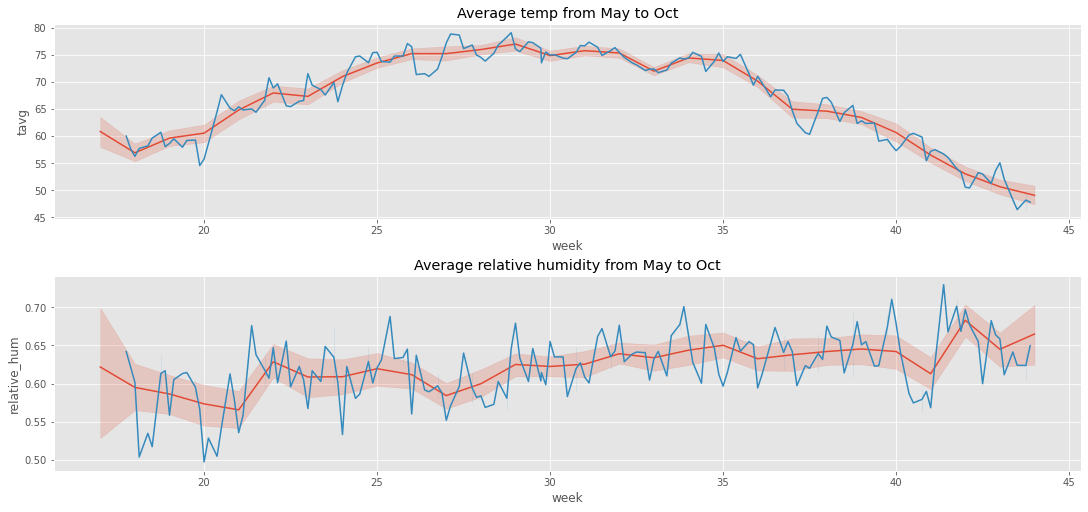

In [69]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(15,7), constrained_layout=True)

sns.lineplot(data=weather_cleaned, x='week', y='tavg', ax=ax[0])
sns.lineplot(data=weather_cleaned.groupby('mth_day').mean(), x='week', y='tavg',ax=ax[0]);

sns.lineplot(data=weather_cleaned, x='week', y='relative_hum', ax=ax[1]);
sns.lineplot(data=weather_cleaned.groupby('mth_day').mean(), x='week', y='relative_hum', ax=ax[1]);

ax[0].set_title("Average temp from May to Oct")
ax[1].set_title("Average relative humidity from May to Oct")

In [11]:
#create function for plotting
def plot_func(dataframe, attr, **kwarg):
    ''' Plot histogram, scatter plot, box plot, and qq plot in a figure.
    
    Note: 
    - For scatter plot, the attribute is plotted agaist saleprice.
    - Box plot is overlaid with strip plot to provide a sense of distribution of the data. 
    - There for categorical features, there will be no qq plot
    
    Parameters:
    data (dataframe): pandas dataframe 
    attr (list): list of dataframe column names to be plotted
    kwarg (string): accept attr: saleprice

    Returns:
    Nil'''
    row = len(attr)
    col = 3
    figsize = (20, row*4)
    fig, ax = plt.subplots(nrows=row, ncols=col, figsize=figsize, constrained_layout=True) 
    for x in range(row):
            #histogram plot
            sns.histplot(x=attr[x], data=dataframe, ax=ax[x,0], color='tab:red', )
            ax[x, 0].set_title(f'histogram: {attr[x]}')
            ax[x, 0].tick_params(labelrotation=90, axis='x')
            #scatter plot
            sns.scatterplot(x='week', y=attr[x], data=dataframe, ax=ax[x,1])
            ax[x, 1].set_title(f'scatter plot: {attr[x]}')
            ax[x, 1].tick_params(labelrotation=90, axis='x')
            #box plot
            sns.boxplot(x=attr[x], data=dataframe, ax=ax[x,2])
            sns.stripplot(x=attr[x], data=dataframe, ax=ax[x,2], alpha= 0.2)
            ax[x, 2].set_title(f'boxplot: {attr[x]}')
            ax[x, 2].tick_params(labelrotation=90, axis='x')
            
    plt.show()

In [12]:
num_features = weather_cleaned.select_dtypes(include='number').columns.to_list()
cat_features = weather_cleaned.select_dtypes(exclude='number').columns.to_list()

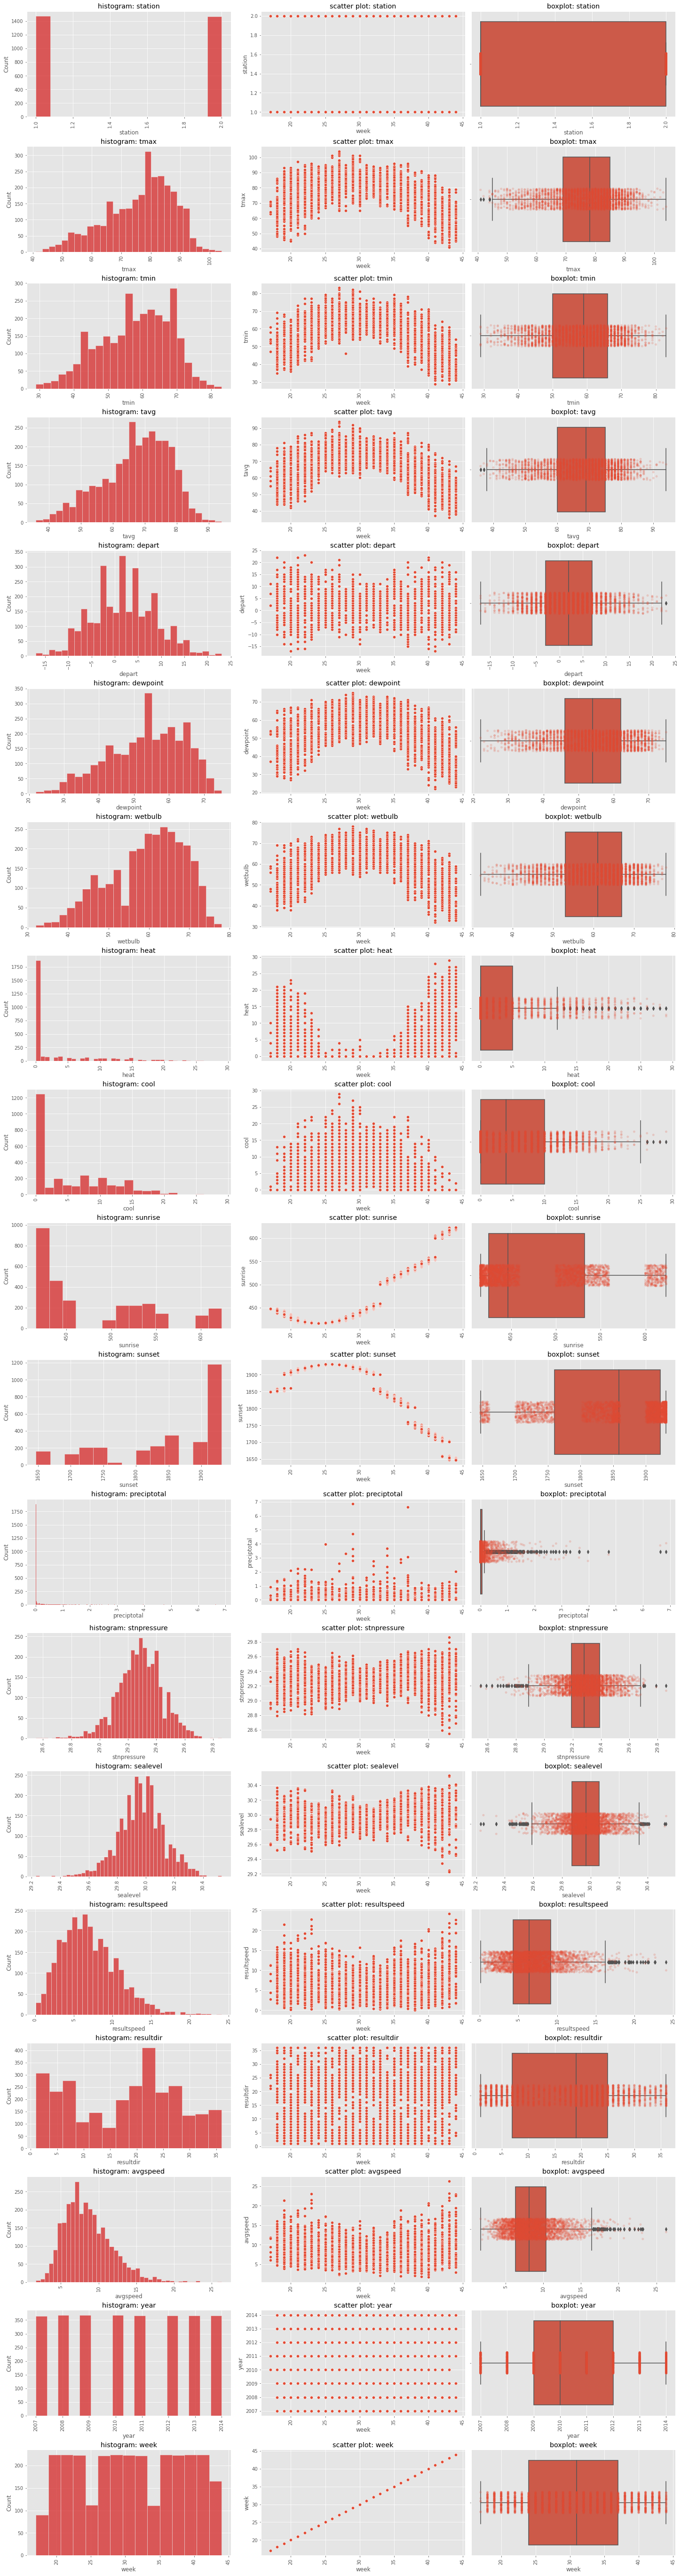

In [13]:
plot_func(weather_cleaned, num_features)

In [74]:
weather_cleaned.codesum.unique()

array(['N', 'BR', 'BR HZ', 'HZ', 'RA', 'RA BR', 'TSRA RA BR', 'RA VCTS',
       'TSRA RA', 'RA HZ', 'TSRA RA BR HZ', 'TSRA BR HZ', 'RA BR HZ VCTS',
       'TSRA RA HZ', 'TSRA BR HZ VCTS', 'TSRA', 'TSRA BR HZ FU',
       'TSRA RA HZ FU', 'BR HZ FU', 'TSRA RA VCTS', 'HZ VCTS', 'TSRA HZ',
       'VCTS', 'RA BR VCTS', 'TSRA RA BR VCTS', 'TS TSRA RA BR HZ VCTS',
       'DZ BR', 'TS TSRA RA BR HZ', 'TS TSRA BR HZ', 'RA BR HZ',
       'TSRA RA DZ BR HZ', 'TS TSRA RA BR', 'TS RA BR', 'TS TSRA RA',
       'TS TSRA RA BR VCTS', 'TS TSRA BR', 'TS RA', 'RA BCFG BR',
       'TSRA BR', 'RA DZ FG+ BCFG BR', 'RA FG+ MIFG BR', 'RA DZ',
       'RA DZ BR', 'TS TSRA RA HZ', 'TSRA RA FG+ FG BR',
       'TSRA DZ FG+ FG BR HZ', 'TS BR', 'RA BR SQ', 'TS TSRA',
       'TSRA RA BR HZ VCTS', 'BR VCTS', 'TS', 'FG+ BR HZ', 'RA SN',
       'TSRA RA DZ BR', 'DZ BR HZ', 'RA BR FU', 'TS BR HZ', 'DZ',
       'FG+ BR', 'FG+ FG BR', 'FG+ MIFG BR', 'TSRA RA FG BR',
       'TSRA FG+ BR', 'RA DZ BR HZ', 'RA DZ SN', 'FG+ FG 

In [72]:
cat_features

['date', 'codesum', 'mth_day']

TypeError: Neither the `x` nor `y` variable appears to be numeric.

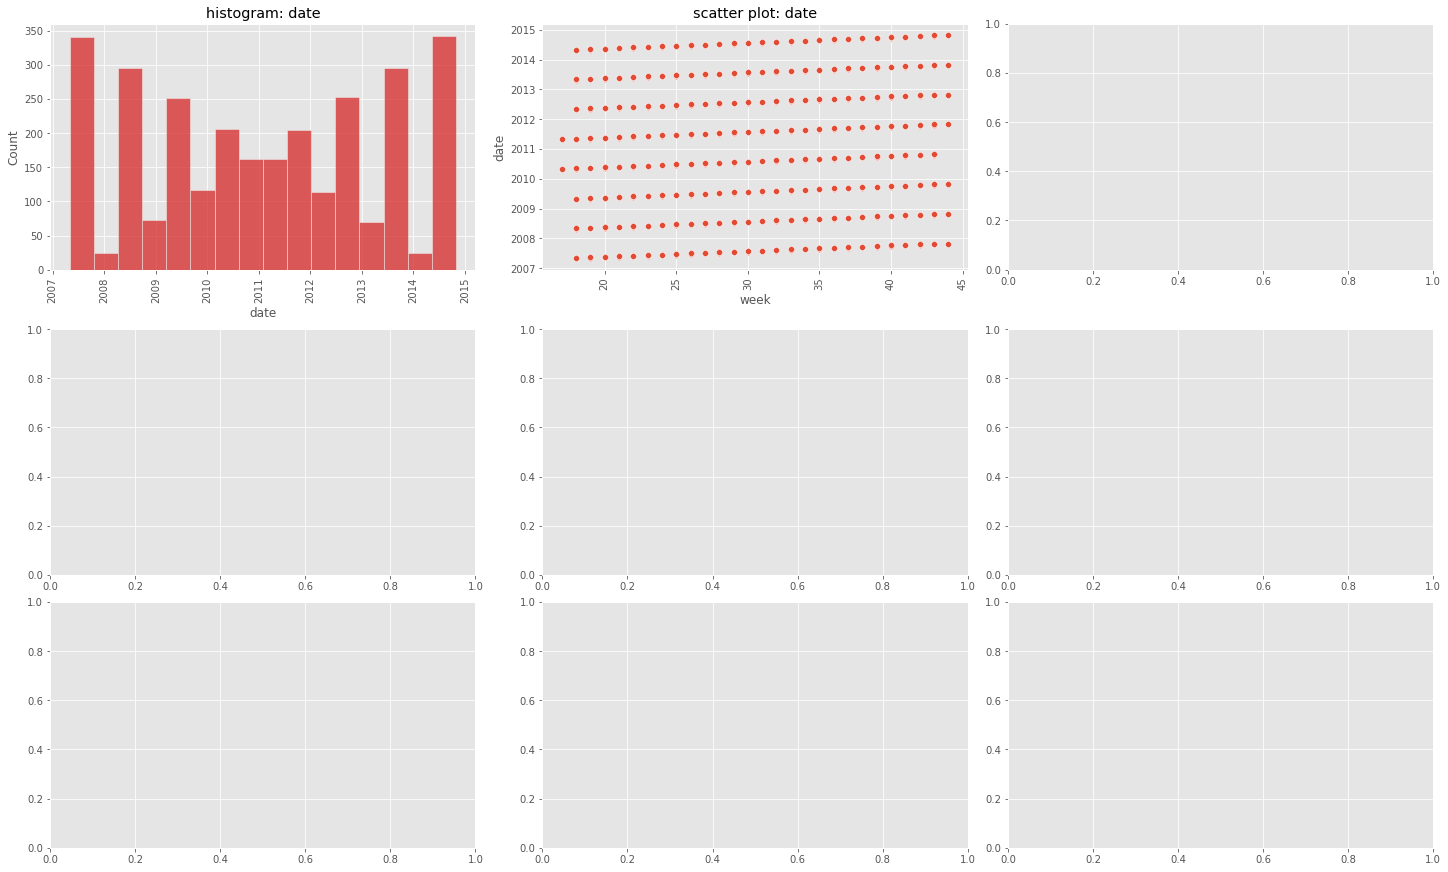

In [71]:
plot_func(weather_cleaned, cat_features,)